Random Forests: 0.64

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [2]:
dataPath = '../../preprocess_data_set/newsData_ratio8_2.csv'

df_train = pd.read_csv(dataPath)
df_train.shape

(26771, 251)

In [3]:
# randomly shuffle the rows
df_train = df_train.sample(frac=1, random_state=42)

df_train = df_train.reset_index()
df_train = df_train.drop('index', axis=1)
df_train

,0,1,2,3,4,5,6,7,8,9,...,241,242,243,244,245,246,247,248,249,target
0,19.657124,50.442482,20.871874,-54.531494,20.362791,28.577585,-1.906657,28.021065,-24.411823,-19.387388,...,-49.060287,-3.104522,27.967051,-30.539959,0.434239,36.554264,-1.757592,37.968136,-14.561114,0
1,73.660179,76.221085,-40.807030,-82.814301,28.292801,36.778252,-1.909100,49.479527,-79.806595,27.742567,...,-107.097870,-24.814592,-22.166080,3.848902,36.787331,59.989563,-6.423959,21.630405,-88.683472,0
2,-13.957203,50.162762,60.824032,-16.521429,-84.106873,33.965801,-24.306961,112.798645,-90.984291,-23.109505,...,-37.652954,39.876980,101.627777,-16.215570,-2.601095,74.666214,-34.334938,4.400374,-16.785315,1
3,34.285301,24.369213,37.394283,-56.808426,-13.195957,27.064581,-27.190607,45.300884,-38.357361,-21.576128,...,-37.443409,8.713444,20.008799,-13.551638,16.853464,48.484596,-13.077551,5.347030,-43.575981,0
4,8.285158,182.228394,3.545697,-74.310005,-46.353405,27.703939,-23.581633,136.181381,-75.572617,-49.096653,...,-108.719910,51.889614,156.074570,9.806570,61.040123,24.597773,-46.054447,-51.063011,-56.279831,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26766,-71.454414,56.266552,-52.882614,-45.946815,-243.017334,76.435471,-80.246399,212.383789,-183.680710,-156.889847,...,-57.277454,78.127159,146.414536,-44.106407,59.677574,120.351700,-139.349457,35.773731,6.932467,1
26767,-0.284165,25.422646,2.497849,-8.947376,-36.106369,29.048079,-8.172162,28.610073,-23.188131,-27.730436,...,4.322698,22.755190,8.053110,2.871661,8.147329,12.612817,-6.104894,10.478649,2.183957,0
26768,71.339561,16.005495,51.056477,-179.901749,-14.259531,126.382141,-4.463017,42.901329,53.434349,-14.907699,...,-106.613243,-39.113091,48.542309,-67.660194,58.561333,206.557541,-90.538963,154.817764,-92.831696,0
26769,81.606827,-113.467224,-3.810923,-238.568436,70.856094,87.432976,53.989868,111.472473,-73.990349,42.114433,...,-40.093098,107.691345,-5.296010,-85.728683,78.135361,180.972107,-158.033691,8.803612,-97.057518,0


In [4]:
train_y = df_train['target']
train_x = df_train.drop(columns=['target'])

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3,random_state=109) # 70% training and 30% test

In [6]:
robust_scaler = RobustScaler().fit(X_train.values)
trans_x = robust_scaler.transform(X_train.values)

In [7]:
trans_x.shape

(18739, 250)

In [ ]:
# Create a pipeline with PCA and D-forests
# higher principle components and estimators increase the accuracy as well as the model construction time
# current it takes 2 minutes to construct the model 
pc_num = 100

pipe = Pipeline([
    ('pca', PCA(n_components = pc_num)), # choose number of components to keep
    ('clf', RandomForestClassifier(n_estimators = 300))
])

pipe.fit(trans_x, y_train)

In [9]:
y_pred = pipe.predict(y_train)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [12]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.14      0.91      0.25      1025
           1       0.94      0.21      0.35      7007

    accuracy                           0.30      8032
   macro avg       0.54      0.56      0.30      8032
weighted avg       0.84      0.30      0.33      8032



In [11]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)

pc_num = 100

pipe_cv = Pipeline([
    ('pca', PCA(n_components = pc_num)), # choose number of components to keep
    ('clf', RandomForestClassifier(n_estimators = 300))
])

scores = cross_val_score(pipe_cv, train_x, train_y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.95182073 0.94938364 0.94863653 0.94583489 0.94994397]
Average CV Score:  0.9491239514109715


In [8]:
randomForest_model = RandomForestClassifier(n_estimators = 300)
randomForest_model.fit(X_train, y_train)
y_pred = randomForest_model.predict(X_test)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      6680
           1       0.84      0.98      0.90      1352

    accuracy                           0.96      8032
   macro avg       0.92      0.97      0.94      8032
weighted avg       0.97      0.96      0.97      8032



In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest object
rfc = RandomForestClassifier()

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding classification report
print("Best hyperparameters: ", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Classification report: ")
print(classification_report(y_test, y_pred))

# Plot the results of the grid search
scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(4, 3, 4, 3, 3)
params = param_grid['n_estimators'], param_grid['max_features'], param_grid['max_depth'], param_grid['min_samples_split'], param_grid['min_samples_leaf']
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
for i in range(4):
    for j in range(3):
        ax = axes[i, j]
        ax.set_title('{} / {}'.format(params[0][i], params[1][j]))
        scores_ij = scores[i, j].mean(axis=(1, 2))
        ax.plot(params[2], scores_ij)
        ax.set_xlabel('max_depth')
        ax.set_ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)
randomForest_model = RandomForestClassifier(n_estimators = 300)
scores = cross_val_score(randomForest_model, train_x, train_y, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.96395892 0.96376541 0.95816212 0.96171087 0.96600672]
Average CV Score:  0.9627208084080351


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    # 'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest object
rfc = RandomForestClassifier()

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding classification report
print("Best hyperparameters: ", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Classification report: ")
print(classification_report(y_test, y_pred))

Best hyperparameters:  {'min_samples_split': 2, 'n_estimators': 300}
Classification report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6454
           1       0.98      0.85      0.91      1578

    accuracy                           0.97      8032
   macro avg       0.97      0.92      0.94      8032
weighted avg       0.97      0.97      0.96      8032



In [7]:
resultReport_df = pd.DataFrame(grid_search.cv_results_)
resultReport_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.297239,1.367212,0.060328,0.021756,2,50,"{'min_samples_split': 2, 'n_estimators': 50}",0.958645,0.960245,0.949306,0.956510,0.959434,0.956828,0.003961,9
1,20.087330,0.421691,0.079731,0.011934,2,100,"{'min_samples_split': 2, 'n_estimators': 100}",0.961046,0.963180,0.950907,0.954642,0.960235,0.958002,0.004532,6
2,38.951590,0.609605,0.145402,0.001309,2,200,"{'min_samples_split': 2, 'n_estimators': 200}",0.961580,0.961580,0.950907,0.955977,0.961302,0.958269,0.004256,5
3,59.923632,2.050946,0.257306,0.066993,2,300,"{'min_samples_split': 2, 'n_estimators': 300}",0.961313,0.963714,0.951441,0.956510,0.961836,0.958963,0.004449,1
4,12.030919,0.686996,0.052850,0.003730,5,50,"{'min_samples_split': 5, 'n_estimators': 50}",0.960512,0.960779,0.949306,0.952775,0.960235,0.956721,0.004769,11
5,27.236570,6.115158,0.099335,0.018025,5,100,"{'min_samples_split': 5, 'n_estimators': 100}",0.962914,0.962113,0.950374,0.957044,0.961035,0.958696,0.004625,3
6,82.479502,14.645781,0.259383,0.053144,5,200,"{'min_samples_split': 5, 'n_estimators': 200}",0.961046,0.961313,0.949840,0.955977,0.961035,0.957842,0.004473,7
7,145.317325,32.301509,0.701095,0.513338,5,300,"{'min_samples_split': 5, 'n_estimators': 300}",0.961046,0.963447,0.952775,0.955977,0.961302,0.958909,0.003927,2
8,27.738657,8.134940,0.194888,0.186656,10,50,"{'min_samples_split': 10, 'n_estimators': 50}",0.958911,0.960779,0.947972,0.953308,0.959701,0.956134,0.004829,12
9,34.351365,10.240577,0.103724,0.008002,10,100,"{'min_samples_split': 10, 'n_estimators': 100}",0.961313,0.959445,0.949573,0.951708,0.961836,0.956775,0.005116,10


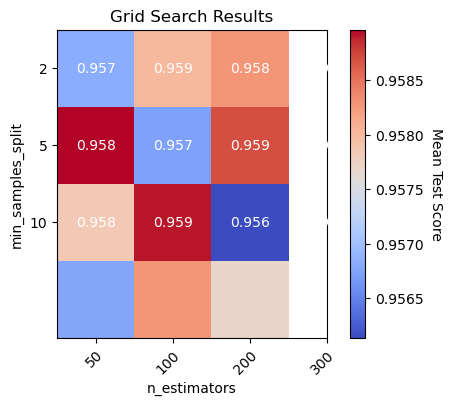

In [12]:
# Extract the mean test score for each combination of hyperparameters
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['n_estimators']), len(param_grid['min_samples_split']))

# Plot a heatmap of the mean test score for each combination of hyperparameters
fig, ax = plt.subplots(figsize=(6, 4))
im = ax.imshow(scores, cmap='coolwarm')

# add axis labels and tick marks
ax.set_xticks(np.arange(len(param_grid['n_estimators'])))
ax.set_yticks(np.arange(len(param_grid['min_samples_split'])))
ax.set_xticklabels(param_grid['n_estimators'])
ax.set_yticklabels(param_grid['min_samples_split'])
ax.set_xlabel('n_estimators')
ax.set_ylabel('min_samples_split')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Print the mean test score for each combination of hyperparameters
for i in range(len(param_grid['min_samples_split'])):
    for j in range(len(param_grid['n_estimators'])):
        text = ax.text(j, i, '{:.3f}'.format(scores[j, i]), ha="center", va="center", color="w")


cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Mean Test Score", rotation=-90, va="bottom")
ax.set_title("Grid Search Results")

plt.show()